# Data Discovery

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Data Understanding

https://opentransportdata.swiss/de/dataset/istdaten

In [2]:
# Clean data contains every "stop" for a month for all swiss railways
data_all = pd.read_pickle('data/istdaten/Juli/data_clean_201807.pkl')

In [3]:
# Look at data integrity and size
data_all.count()

BETRIEBSTAG            4672995
FAHRT_BEZEICHNER       4672995
BETREIBER_ABK          4672995
PRODUKT_ID             4672995
LINIEN_ID              4672995
LINIEN_TEXT            4672995
VERKEHRSMITTEL_TEXT    4672995
ZUSATZFAHRT_TF         4672995
FAELLT_AUS_TF          4672995
HALTESTELLEN_NAME      4672995
ANKUNFTSZEIT           4238152
AN_PROGNOSE            3503906
AN_PROGNOSE_STATUS     4672995
ABFAHRTSZEIT           4237962
AB_PROGNOSE            3505639
AB_PROGNOSE_STATUS     4672995
DURCHFAHRT_TF          4672995
dtype: int64

In [4]:
# Produkt_ID seems to be containing information about the type of public transport
data_all['PRODUKT_ID'].value_counts()

Zug    4672995
Name: PRODUKT_ID, dtype: int64

In [5]:
data_all.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,01.07.2018,80:06____:17010:000,DB,Zug,17010,RE,RE,False,False,Basel Bad Bf,NaN,NaN,PROGNOSE,01.07.2018 05:45,NaN,UNBEKANNT,False
1,01.07.2018,80:06____:17011:000,DB,Zug,17011,RE,RE,False,False,Basel Bad Bf,01.07.2018 02:20,NaN,UNBEKANNT,NaN,NaN,PROGNOSE,False
2,01.07.2018,80:06____:17012:000,DB,Zug,17012,RE,RE,False,False,Basel Bad Bf,NaN,NaN,PROGNOSE,01.07.2018 06:34,NaN,UNBEKANNT,False
3,01.07.2018,80:06____:17014:000,DB,Zug,17014,RE,RE,False,False,Basel Bad Bf,NaN,NaN,PROGNOSE,01.07.2018 09:48,NaN,UNBEKANNT,False
4,01.07.2018,80:06____:17016:000,DB,Zug,17016,RE,RE,False,False,Basel Bad Bf,NaN,NaN,PROGNOSE,01.07.2018 10:48,NaN,UNBEKANNT,False


In [6]:
data_all['LINIEN_ID'].unique().shape

(21989,)

In [7]:
def plot_value_counts_pie_chart(df_col, title_upperpart):
    """
    function takes a column of a dataframe as input and makes a pie chart out of it,
    based on the value_counts function. title_upperpart is also provided to give the 
    plto a title
    """
    plt.figure()
    df_size = len(df_col)
    print(df_size)
    y=df_col.value_counts().values
    for item in y:
        print(item/df_size)
    df_col.value_counts().plot(
        kind='pie',
        explode=explode,
        y=df_col.value_counts().values,
        legend=False,
        autopct='%1.1f%%',
        startangle=0,
        shadow=False,
        label='',
        title=title_upperpart + ', \n total: ' + str(df_size) +
        ' stops (13th September 2019)',
        figsize=(10, 10))

4672995
1.0


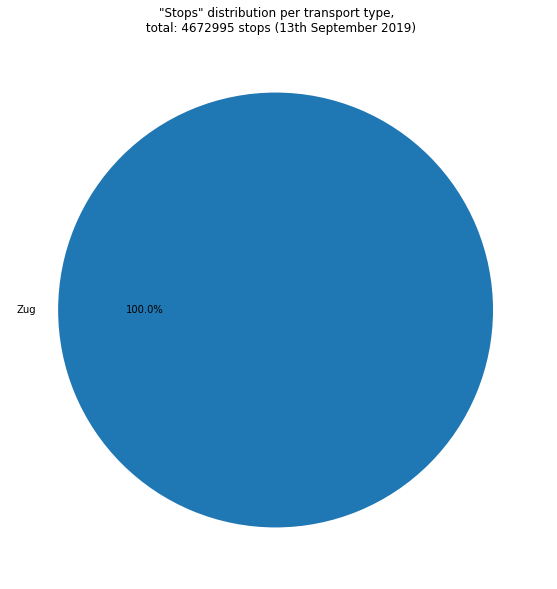

In [8]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_all['PRODUKT_ID'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_all['PRODUKT_ID'],
                            '"Stops" distribution per transport type')

In [9]:
# Keep only trains data (Zug is train in german)
data_train = data_all[data_all['PRODUKT_ID'] == 'Zug']

In [10]:
pd.unique(data_train['BETREIBER_ABK'])

array(['DB', 'NeTS-DB', 'DB Regio', 'SBB', 'NeTS-ÖBB', 'TRENORD', 'BRB',
       'JB', 'MG', 'MVR-mtgn', 'KWO-mib', 'PB', 'RB', 'BOB-spb', 'WAB',
       'DFB', 'AB-ab', 'TPC-al', 'TPC-aomc', 'TPC-asd', 'MBC', 'BDWM-bd',
       'BLM', 'BLS-bls', 'BOB', 'SBB GmbH', 'BC-cmBC', 'ASM-bti',
       'TPC-bvb', 'MVR-cev', 'CJ', 'TRN-cmn', 'FLP', 'MGB-fo', 'FART',
       'FW', 'TPF', 'LEB', 'ASM-rvo', 'TMR-mc', 'MOB', 'THURBO', 'NStCM',
       'TRAVYS-oc', 'TRAVYS-pbr', 'RhB', 'RA', 'SZU', 'ASM-snb',
       'SOB-sob', 'ZB', 'RBS', 'MGB-bvz', 'WB', 'WSB', 'TRAVYS-ysc',
       'VDBB', 'NS'], dtype=object)

In [94]:
month = '05'
strings = []
for i in range(1, len(pd.unique(data_train['BETREIBER_ABK']))-26):
    string = '{:>02}.{}.2019'.format(i, month)
    strings.append(string)

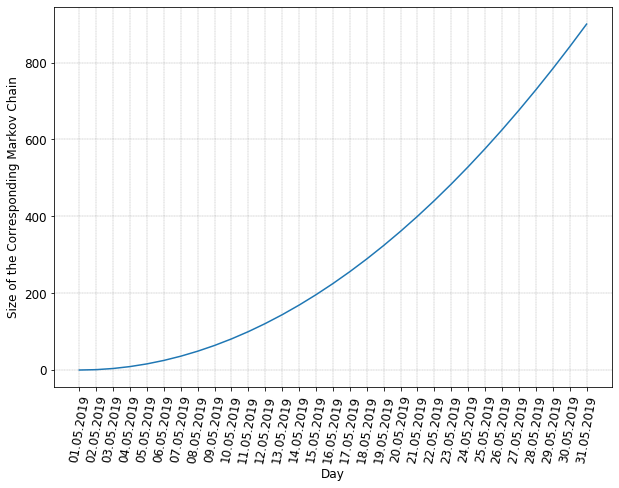

In [95]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 7))
x=np.arange(len(strings))
y=x**2
plt.plot(x,y)
font = {'size': 12}
plt.rc('font', **font)
plt.ylabel('Size of the Corresponding Markov Chain')
plt.xlabel('Day')
xticks=[s for s in strings]
plt.xticks(np.arange(len(strings)), xticks, rotation=80, horizontalalignment='center')
plt.grid(linewidth=.31, color='gray', linestyle='--')
plt.show();
plt.close();

4672995
0.4189178460494822
0.09967633177437596
0.08732772023081557
0.032735108854171684
0.029206536707186717
0.028558130278333274
0.025138053860532698
0.02182754314952188
0.018724822089473667
0.01679415449834635
0.014714118033509558
0.014543349607692711
0.013966417682877897
0.013189185950338059
0.012685012502688319
0.011862841710722995
0.009198383477833808
0.008813619530943218
0.008552117004191102
0.008372574762010232
0.008229197762890822
0.007942871755694154
0.007114281098096617
0.006526435401707042
0.006193030379874149
0.005625942249028727
0.0050888134911336305
0.004671736220560904
0.004633431022288703
0.00424567113810308
0.004194098217524307
0.003936233614630445
0.0038668990658025527
0.0032219165652862887
0.0031459481553051095
0.003111280880891163
0.0029480022983118964
0.0029043472120128524
0.002770814006862836
0.002450248716294368
0.0024429728685778605
0.002065484769403776
0.0016518314271682293
0.0008371504784404863
0.0007815116429613128
0.000617591073818825
0.0005970475037957455
0

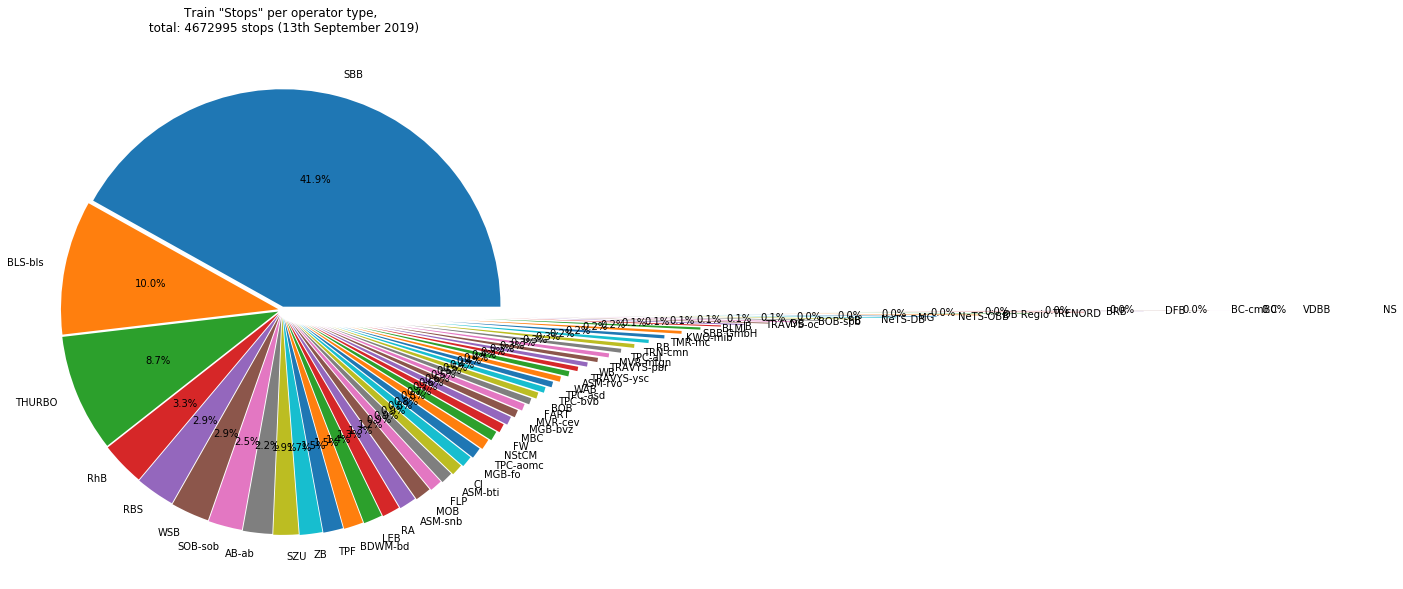

In [27]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_train['BETREIBER_ABK'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_train['BETREIBER_ABK'],
                            'Train "Stops" per operator type')

In [37]:
# Keep only trains operated by SBB
data_train_SBB = data_train[data_train['BETREIBER_ABK'] == 'SBB']

1957601
0.6533108636540337
0.11239573334913498
0.08540964169920223
0.07319673416595109
0.05655136056836914
0.00616877494443454
0.003691252711865186
0.0034782368827968517
0.002097465213799952
0.0012985281474621232
0.0007922962850958903
0.0006763380280251185
0.0005751938214171325
0.00034838560053861845
4.597463936726637e-06
2.0433173052118383e-06
1.5324879789088788e-06
1.0216586526059191e-06


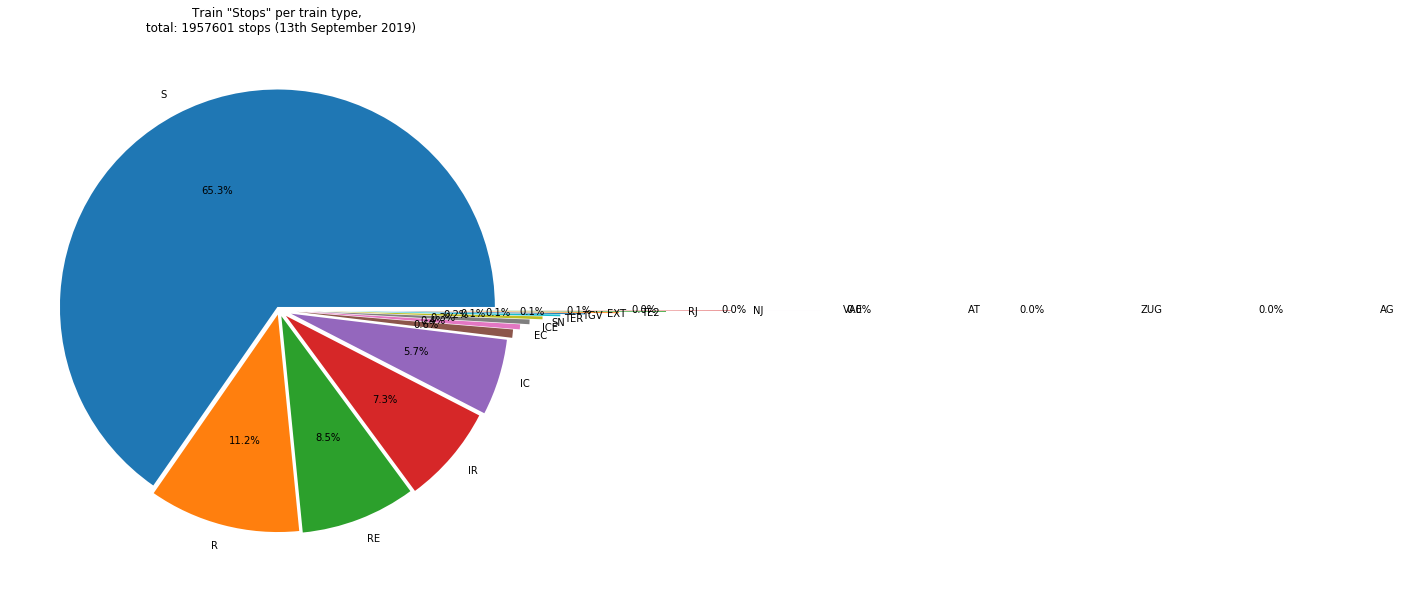

In [38]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_train_SBB['VERKEHRSMITTEL_TEXT'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_train_SBB['VERKEHRSMITTEL_TEXT'],
                            'Train "Stops" per train type')

In [39]:
# Take a look at the data, to understand its size
data_train_SBB.describe(include='object')

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
count,1957601,1957601,1957601,1957601,1957601,1957601,1957601,1957601,1784706,1600957,1957601,1784621,1600727,1957601
unique,31,8699,1,1,11485,78,18,703,41723,1138938,3,41606,1128243,3
top,20.07.2018,85:11:12212:001,SBB,Zug,12212,R,S,Zürich HB,18.07.2018 07:24,02.07.2018 05:59:22,REAL,23.07.2018 07:18,03.07.2018 12:51:29,REAL
freq,65562,961,1957601,1957601,961,220026,1278922,59758,83,8,1540084,79,9,1540291


In [41]:
# Example of a route
data_train_SBB.loc[data_train_SBB['FAHRT_BEZEICHNER'] == '85:11:12212:001'].head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
2723,01.07.2018,85:11:12212:001,SBB,Zug,12212,S2,S,False,False,St-Maurice,NaN,NaN,PROGNOSE,01.07.2018 05:03,01.07.2018 05:03:42,REAL,False
2724,01.07.2018,85:11:12212:001,SBB,Zug,12212,S2,S,False,False,Bex,01.07.2018 05:06,01.07.2018 05:07:08,REAL,01.07.2018 05:06,01.07.2018 05:07:50,REAL,False
2725,01.07.2018,85:11:12212:001,SBB,Zug,12212,S2,S,False,False,Aigle,01.07.2018 05:12,01.07.2018 05:12:06,REAL,01.07.2018 05:12,01.07.2018 05:12:42,REAL,False
2726,01.07.2018,85:11:12212:001,SBB,Zug,12212,S2,S,False,False,Roche VD,01.07.2018 05:15,01.07.2018 05:15:33,REAL,01.07.2018 05:15,01.07.2018 05:16:31,REAL,False
2727,01.07.2018,85:11:12212:001,SBB,Zug,12212,S2,S,False,False,Villeneuve,01.07.2018 05:19,01.07.2018 05:18:52,REAL,01.07.2018 05:19,01.07.2018 05:19:33,REAL,False
